In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pickle

def unpickle(file): #If needed, for the downloaded CIFAR10 dataset
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data() #Loading data
print("x_train: ", x_train.shape)

K = len(np.unique(y_train)) #Classes
Ntr = x_train.shape[0]
Nte = x_test.shape[0]
Din = 3072 #CIFAR10
# Din = 784 # MINIST

#Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0
mean_image = np.mean(x_train, axis=0)
x_train = x_train - mean_image
x_test = x_test - mean_image

y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)

x_train = np.reshape(x_train,(Ntr,Din))
x_test = np.reshape(x_test,(Nte,Din))
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")

std=1e-5 #To facilitate random samples
w1 = std*np.random.randn(Din, K) #Initialization of weight matrix
b1 = np.zeros(K) #Initialization of bias matrix
print("w1:", w1.shape)
print("b1:", b1.shape)
batch_size = Ntr

170500096/170498071 [==============================] - 2761s 16us/step
x_train:  (50000, 32, 32, 3)
w1: (3072, 10)
b1: (10,)


In [13]:
def sigmoid(hypo): #Sigmoid activation
    return 1/(1+ np.exp(-hypo))

def getAcc(predictions,labels): #Checking accuracy
    pred_class = np.argmax(predictions, axis=1)
    real_class = np.argmax(labels, axis=1)
    valid_pred = [pred_class == real_class]
    return 100*np.sum(valid_pred)/len(real_class)

w1 = std*np.random.randn(Din, K) #To ensure that the weight matrix has not been changed due to repeated executions

#Rearranging train and test samples:
x_train_ra = np.concatenate((np.ones((x_train.shape[0],1)),x_train), axis=1); print('Rearranged x_train: ', x_train_ra.shape)
x_test_ra  = np.concatenate((np.ones((x_test.shape[0],1)),x_test), axis=1)

#Rearranging weight matrix and bias matrix into single matrix
w1 = np.concatenate((b1.reshape(1,K), w1), axis=0); print('Rearranged w1: ',w1.shape)

iterations = 300  #Interations of gradient descent
lr = 1.4e-2 # Learning rate
lr_decay= 0.999
reg = 5e-6
lr_hitory = []
loss_history = [] #To store the values of loss function at each iteration 
train_acc_history = [] #To store the values of the training accuracies
val_acc_history = [] #TO store the values of the validation accuracies

m = x_train.shape[0]  #Number of training examples

# Running gradient descent number of times speciied in iterations
print("Gradient descent is started") #In order to ensure the running process

for t in range(1,iterations+1):    
    # Forward Propagation
    hypo = x_train_ra.dot(w1)
    loss = (1/(2*m))*np.sum(( hypo - y_train)**2) + (1/(2*m))*reg*np.sum(w1**2) 
    loss_history.append(loss)
    
    # Backward Propagation
    dw1 = (1/m)*(x_train_ra.T.dot(hypo - y_train))  + (1/m)*reg*w1 
    w1 = w1 - lr*dw1
    
    # Training Accuracy and Validation Accuracy
    train_acc = getAcc(hypo, y_train)
    train_acc_history.append(train_acc)
    valid_acc = getAcc(x_test_ra.dot(w1), y_test)
    val_acc_history.append(valid_acc)
    
    # Print details for selected iterations
    if (t%10==0) or (t==1):
        print("| Epoch {:03} | Loss {:.3f} | Tr Acc: {:.3f} | Val Acc: {:.3f} | LR: {:.3f} |"\
             .format(t,loss,train_acc,valid_acc,lr))
    
    # Decaying learning rate
    lr_hitory.append(lr)
    lr = lr*lr_decay
    
print("Gradient Descent is finished in order to train the parameters")

Rearranged x_train:  (50000, 3073)
Rearranged w1:  (3073, 10)
Gradient descent is started
| Epoch 001 | Loss 0.500 | Tr Acc: 9.892 | Val Acc: 24.920 | LR: 0.014 |
| Epoch 010 | Loss 0.456 | Tr Acc: 32.262 | Val Acc: 32.790 | LR: 0.014 |
| Epoch 020 | Loss 0.440 | Tr Acc: 35.148 | Val Acc: 35.040 | LR: 0.014 |
| Epoch 030 | Loss 0.430 | Tr Acc: 36.478 | Val Acc: 36.390 | LR: 0.014 |
| Epoch 040 | Loss 0.422 | Tr Acc: 37.150 | Val Acc: 37.330 | LR: 0.013 |
| Epoch 050 | Loss 0.417 | Tr Acc: 37.652 | Val Acc: 37.800 | LR: 0.013 |
| Epoch 060 | Loss 0.413 | Tr Acc: 38.100 | Val Acc: 38.140 | LR: 0.013 |
| Epoch 070 | Loss 0.409 | Tr Acc: 38.448 | Val Acc: 38.420 | LR: 0.013 |
| Epoch 080 | Loss 0.407 | Tr Acc: 38.762 | Val Acc: 38.710 | LR: 0.013 |
| Epoch 090 | Loss 0.405 | Tr Acc: 38.946 | Val Acc: 38.880 | LR: 0.013 |
| Epoch 100 | Loss 0.403 | Tr Acc: 39.208 | Val Acc: 39.030 | LR: 0.013 |
| Epoch 110 | Loss 0.402 | Tr Acc: 39.402 | Val Acc: 39.020 | LR: 0.013 |
| Epoch 120 | Loss 0.40

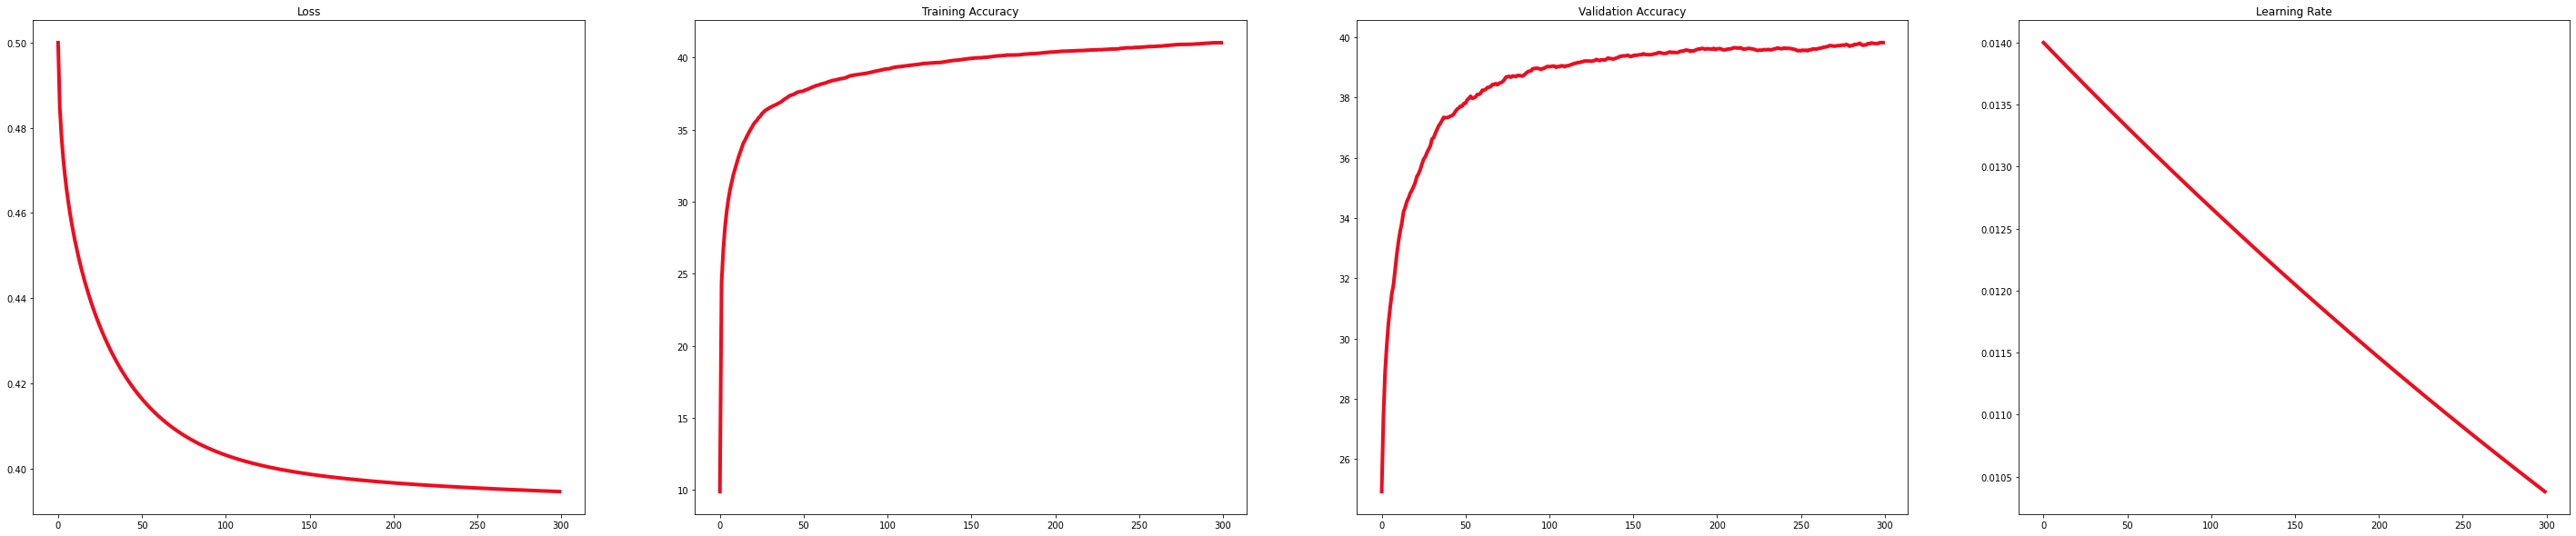

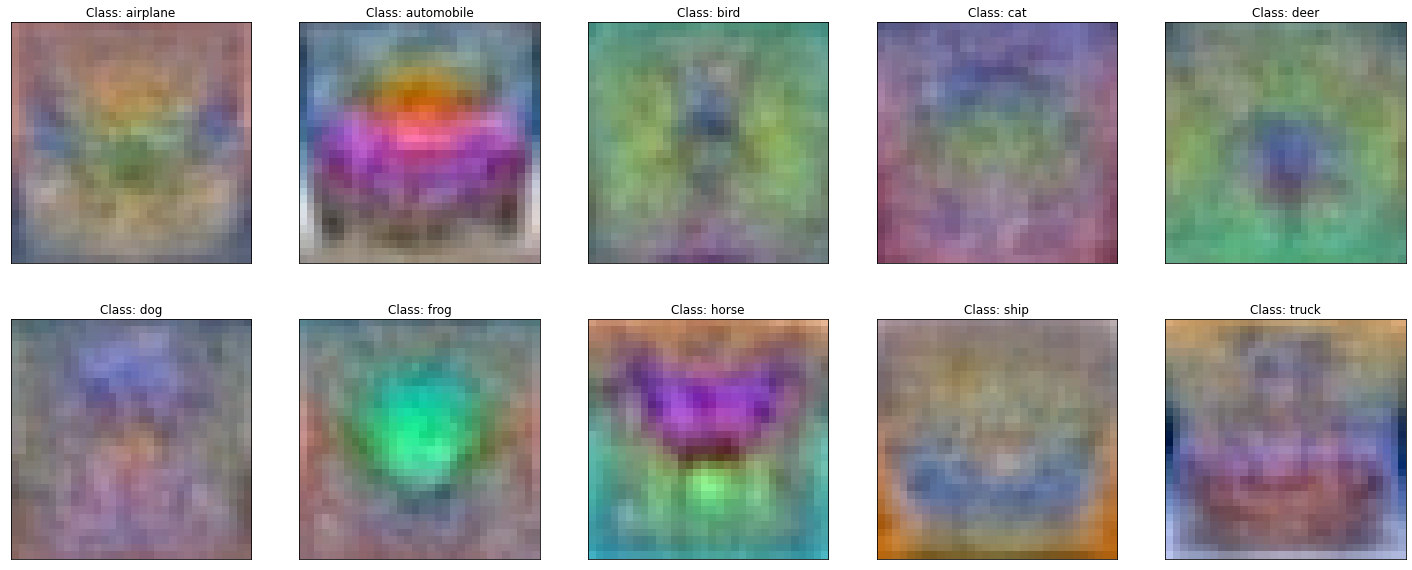

In [15]:
#Plotting learning rate, training and testing loss and accuracies-------
fig, axes  = plt.subplots(1,4, sharex='all', sharey='all', figsize=(50,10))
items = {"Loss":loss_history, "Training Accuracy":train_acc_history,\
         "Validation Accuracy": val_acc_history, "Learning Rate":lr_hitory}
location = 1
for key in items.keys():
    plt.subplot(1,4,location)
    plt.plot(items[key], color='#EF0C1E', linewidth=4)
    plt.title(key)
    location+=1
plt.show()

#Showing the weights matrix W1 as 10 images
weights = w1[1:,] #To remove the row of bias terms
weights_pos =  weights- np.min(weights) #TO ensure that the minimum weight is zero
images = ((weights_pos/np.max(weights_pos))*255).astype('uint8')
CIFAR10 = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
fig, axes  = plt.subplots(2,5, sharex='all', sharey='all', figsize=(25,10))
location = 1 #Location of the image in the grid of 2x5
for i in range(K):
    image = images[:,i].reshape(32,32,3)
    plt.subplot(2,5,location),plt.imshow(image[:,:,::-1])
    plt.title("Class: {}".format(CIFAR10[i])),plt.xticks([]),plt.yticks([])
    location+=1
plt.show()